In [2]:
import numpy as np
from tqdm import tqdm
from numpy.linalg import norm

In [3]:
def calc_res(F1, F2, F3, F4, F5, F6, sig, dx, dy, dz):
    
    G1 = F2[1:-1,1:-1,1:-1]+F3[1:-1,1:-1,1:-1]+F4[1:-1,1:-1,1:-1]+F5[1:-1,1:-1,1:-1]+F6[1:-1,1:-1,1:-1]
    r1 =  -(F1[1:-1,1:-1,1:-1] - F1[0:-2, 1:-1, 1:-1])/dx + sig * (G1 - 5/6 * F1[1:-1,1:-1,1:-1])
    
    G2 = F1[1:-1,1:-1,1:-1]+F3[1:-1,1:-1,1:-1]+F4[1:-1,1:-1,1:-1]+F5[1:-1,1:-1,1:-1]+F6[1:-1,1:-1,1:-1]
    r2 = (F2[2:,1:-1,1:-1] - F2[1:-1, 1:-1, 1:-1])/dx + sig * (G2 - 5/6 * F2[1:-1, 1:-1, 1:-1])
    
    G3 = F1[1:-1,1:-1,1:-1]+F2[1:-1,1:-1,1:-1]+F4[1:-1,1:-1,1:-1]+F5[1:-1,1:-1,1:-1]+F6[1:-1,1:-1,1:-1]
    r3 = -(F3[1:-1,1:-1,1:-1] - F3[1:-1,0:-2,1:-1])/dy + sig * (G3 - 5/6 * F3[1:-1, 1:-1, 1:-1])
    
    G4 = F1[1:-1,1:-1,1:-1]+F2[1:-1,1:-1,1:-1]+F3[1:-1,1:-1,1:-1]+F5[1:-1,1:-1,1:-1]+F6[1:-1,1:-1,1:-1]
    r4 = (F4[1:-1, 2:, 1:-1] - F4[1:-1, 1:-1, 1:-1])/dy + sig * (G4 - 5/6 * F4[1:-1, 1:-1, 1:-1])
    
    G5 = F1[1:-1,1:-1,1:-1]+F2[1:-1,1:-1,1:-1]+F3[1:-1,1:-1,1:-1]+F4[1:-1,1:-1,1:-1]+F6[1:-1,1:-1,1:-1]
    r5 = -(F5[1:-1,1:-1,1:-1] - F5[1:-1,1:-1, 0:-2])/dz + sig * (G5 - 5/6 * F5[1:-1, 1:-1, 1:-1])
    
    G6 = F1[1:-1,1:-1,1:-1]+F2[1:-1,1:-1,1:-1]+F3[1:-1,1:-1,1:-1]+F4[1:-1,1:-1,1:-1]+F5[1:-1,1:-1,1:-1]
    r6 = (F6[1:-1, 1:-1, 2:] - F6[1:-1, 1:-1, 1:-1])/dz + sig * (G6 - 5/6 * F6[1:-1, 1:-1, 1:-1])
    
    res = np.sqrt(norm(r1)**2+norm(r2)**2+norm(r3)**2+norm(r4)**2+norm(r5)**2+norm(r6)**2)
    return res

def Numerical_Method(sig, eps, maxiter = 300):
    Nx,Ny,Nz = 100,100,100
    dx,dy,dz = 1/Nx,1/Ny,1/Nz
    x = np.linspace(-1+dx/2, 1-dx/2, Nx)
    y = np.linspace(-1+dx/2, 1-dx/2, Ny)
    z = np.linspace(-1+dz/2, 1-dz/2, Nz)
    F1 = np.zeros((Nx+2,Ny+2,Nz+2))
    F2 = np.zeros((Nx+2,Ny+2,Nz+2))
    F3 = np.zeros((Nx+2,Ny+2,Nz+2))
    F4 = np.zeros((Nx+2,Ny+2,Nz+2))
    F5 = np.zeros((Nx+2,Ny+2,Nz+2))
    F6 = np.zeros((Nx+2,Ny+2,Nz+2))
    idx = np.where((abs(x) <= 0.2))[0]
    idy = np.where((abs(y) <= 0.2))[0]
    idz = np.where((abs(z) <= 0.2))[0]
    ax,bx = np.meshgrid(idy, idz)
    q = 1
    F1[[0], ax, bx] = q
    ay,by = np.meshgrid(idx, idz)
    F3[ay, [0], by] = q
    az,bz = np.meshgrid(idx, idy)
    F5[az, bz, [0]] = q
    res = np.inf
    h = 0
    tol = 1e-6
    constx = eps + 1/dx + 5/6*sig
    consty = eps + 1/dy + 5/6*sig
    constz = eps + 1/dz + 5/6*sig
    res_arr1 = []
    res_arr2 = []
    while (h<=maxiter) & (res >= tol):
        h += 1
        newF1 = np.zeros((Nx+2,Ny+2,Nz+2))
        newF1[[0], ax, bx] = q
        for i in range(1, Nx):
            G = F2[i,1:-1,1:-1]+F3[i,1:-1,1:-1]+F4[i,1:-1,1:-1]+F5[i,1:-1,1:-1]+F6[i,1:-1,1:-1]
            newF1[i, 1:-1,1:-1] = (eps * F1[i, 1:-1, 1:-1] + sig/6*G + newF1[i-1,1:-1,1:-1]/dx)/constx
        # print(newF1)
        newF2 = np.zeros((Nx+2,Ny+2,Nz+2))

        for i in range(Nx,0,-1):
            G = F1[i,1:-1,1:-1]+F3[i,1:-1,1:-1]+F4[i,1:-1,1:-1]+F5[i,1:-1,1:-1]+F6[i,1:-1,1:-1]
            newF2[i,1:-1,1:-1] = (eps*F2[i,1:-1,1:-1] + sig/6*G + newF2[i+1,1:-1,1:-1]/dx)/constx

        newF3 = np.zeros((Nx+2,Ny+2,Nz+2))
        newF3[ay,[0], by] = q
        
        for j in range(1, Ny):
            G = F1[1:-1,j,1:-1]+F2[1:-1,j,1:-1]+F4[1:-1,j,1:-1]+F5[1:-1,j,1:-1]+F6[1:-1,j,1:-1]
            newF3[1:-1,j,1:-1] = (eps * F3[1:-1,j,1:-1] + sig/6*G + newF3[1:-1, j - 1, 1:-1]/dy)/consty

        newF4 = np.zeros((Nx+2,Ny+2,Nz+2))
        for j in range(Nx,0,-1):
            G = F1[1:-1,j,1:-1]+F2[1:-1,j,1:-1]+F3[1:-1,j,1:-1]+F5[1:-1,j,1:-1]+F6[1:-1,j,1:-1]
            newF4[1:-1,j,1:-1] = (eps * F4[1:-1,j,1:-1] + sig/6*G + newF4[1:-1, j+1, 1:-1]/dy)/consty

        newF5 = np.zeros((Nx+2,Ny+2,Nz+2))
        newF5[az,bz,[0]] = q
        for k in range(1, Nz):
            G = F1[1:-1,1:-1,k]+F2[1:-1,1:-1,k]+F3[1:-1,1:-1,k]+F4[1:-1,1:-1,k]+F6[1:-1,1:-1,k]
            newF5[1:-1,1:-1,k] = (eps * F5[1:-1,1:-1,k] + sig/6*G + newF5[1:-1,1:-1,k-1]/dz)/constz

        newF6 = np.zeros((Nx+2,Ny+2,Nz+2))
        for k in range(Nz,0,-1):
            G = F1[1:-1,1:-1,k]+F2[1:-1,1:-1,k]+F3[1:-1,1:-1,k]+F4[1:-1,1:-1,k]+F5[1:-1,1:-1,k]
            newF6[1:-1,1:-1,k] = (eps * F6[1:-1,1:-1,k] + sig/6*G + newF6[1:-1,1:-1,k+1]/dz)/constz

        res = np.sqrt(norm(newF1 - F1)+
                      norm(newF2 - F2)+
                      norm(newF3 - F3)+
                      norm(newF4 - F4)+
                      norm(newF5 - F5)+
                      norm(newF6 - F6))

        F1 = newF1;F2 = newF2;F3 = newF3;F4 = newF4;F5 = newF5;F6 = newF6
        res_arr1.append(res)
        res2 = calc_res(F1, F2, F3, F4, F5, F6, sig, dx, dy, dz)
        res_arr2.append(res2)
    F1 = F1.reshape(1,Nx+2,Ny+2,Nz+2)
    F2 = F2.reshape(1,Nx+2,Ny+2,Nz+2)
    F3 = F3.reshape(1,Nx+2,Ny+2,Nz+2)
    F4 = F4.reshape(1,Nx+2,Ny+2,Nz+2)
    F4 = F4.reshape(1,Nx+2,Ny+2,Nz+2)
    F5 = F5.reshape(1,Nx+2,Ny+2,Nz+2)
    F6 = F6.reshape(1,Nx+2,Ny+2,Nz+2)
    solu = np.concatenate((F1,F2,F3,F4,F5,F6),axis = 0)
    return res_arr2,res_arr1,solu

In [4]:
res_arr1,res_1, solu1 = Numerical_Method(0.1, 0.15)
res_arr2,res_2, h2 = Numerical_Method(1, 1.5)
res_arr3,res_3, h3 = Numerical_Method(10, 15)
res_arr4,res_4, h4 = Numerical_Method(100, 150)

In [5]:
Nx = 100
Ny = 100
Nz = 100
dx = 1/Nx
dy = dx
dz = dx
x = np.linspace(-1+dx/2, 1-dx/2, Nx)
y = np.linspace(-1+dx/2, 1-dx/2, Ny)
z = np.linspace(-1+dz/2, 1-dz/2, Nz)
x = np.insert(x, 0, 0)
x = np.append(x, 1)
y = np.insert(y, 0, 0)
y = np.append(y, 1)
z = np.insert(z, 0, 0)
z = np.append(z, 1)
X,Y,Z = np.meshgrid(x,y,z)

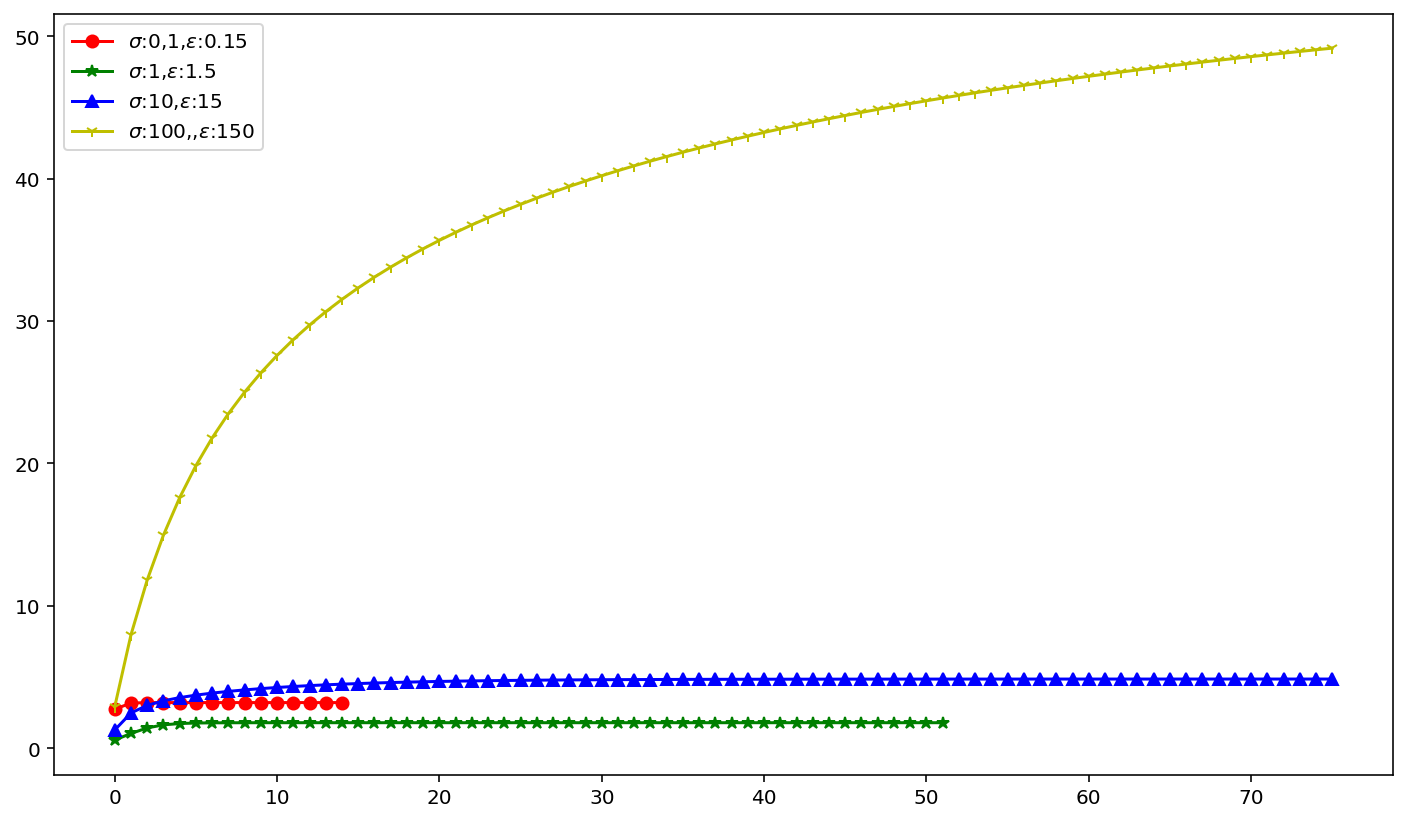

In [59]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 7))
plt.plot(np.array(res_arr1)*1e3, 'ro-', label = ('$\sigma$:0,1,$\epsilon$:0.15'))
plt.plot(np.array(res_arr2)*1e3, 'g*-', label = ('$\sigma$:1,$\epsilon$:1.5'))
plt.plot(np.array(res_arr3)[::4]*1e3, 'b^-', label = ('$\sigma$:10,$\epsilon$:15'))
plt.plot(np.array(res_arr4)[::4]*1e3, 'y1-', label = ('$\sigma$:100,,$\epsilon$:150'))
plt.legend(loc=0)

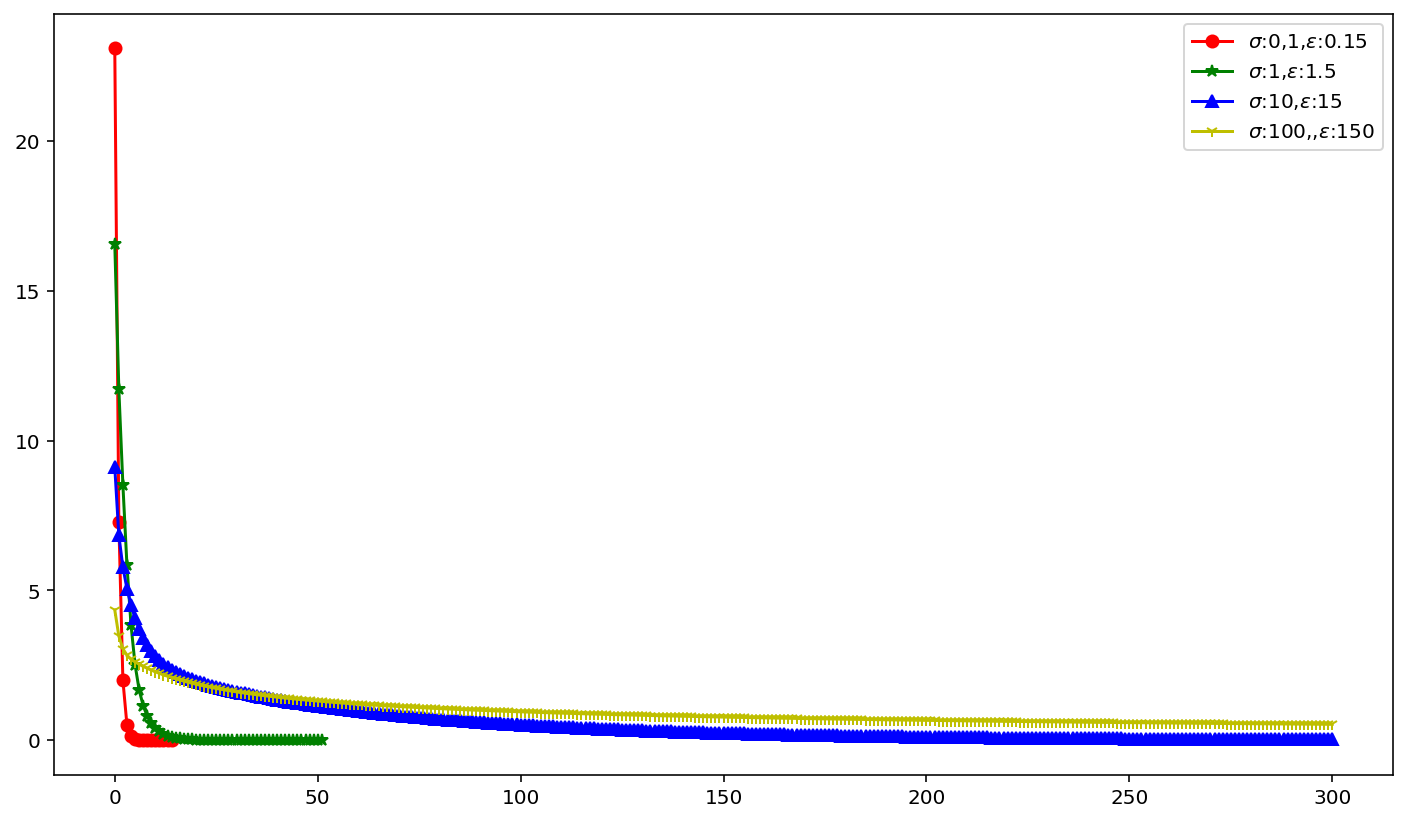

In [46]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 7))
plt.plot(res_arr1, 'ro-', label = ('$\sigma$:0,1,$\epsilon$:0.15'))
plt.plot(res_arr2, 'g*-', label = ('$\sigma$:1,$\epsilon$:1.5'))
plt.plot(res_arr3, 'b^-', label = ('$\sigma$:10,$\epsilon$:15'))
plt.plot(res_arr4, 'y1-', label = ('$\sigma$:100,,$\epsilon$:150'))
plt.legend(loc=0)
# plt.plot(res_5[:20], 'k1-')

In [ ]:
from mayavi import mlab
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.contour3d(solu1[0])
mlab.contour3d(solu1[1])
mlab.contour3d(solu1[2])
mlab.contour3d(solu1[3])
mlab.contour3d(solu1[4])
mlab.contour3d(solu1[5])
mlab.show()

In [ ]:
from mayavi import mlab
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.contour3d(solu2[0])
mlab.contour3d(solu2[1])
mlab.contour3d(solu2[2])
mlab.contour3d(solu2[3])
mlab.contour3d(solu2[4])
mlab.contour3d(solu2[5])
mlab.show()

In [ ]:
from mayavi import mlab
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.contour3d(solu3[0])
mlab.contour3d(solu3[1])
mlab.contour3d(solu3[2])
mlab.contour3d(solu3[3])
mlab.contour3d(solu3[4])
mlab.contour3d(solu3[5])
mlab.show()

In [ ]:
from mayavi import mlab
mlab.axes(xlabel='x', ylabel='y', zlabel='z')
mlab.contour3d(solu4[0])
mlab.contour3d(solu4[1])
mlab.contour3d(solu4[2])
mlab.contour3d(solu4[3])
mlab.contour3d(solu4[4])
mlab.contour3d(solu4[5])
mlab.show()